# Geometric Transformations of Images
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations

In [3]:
#init modules
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

#set basic vars
baseDir=os.path.join('..','..','ExamplesRepo')
#file name
baseFileNameList=('cameraman.tif', 'eight.tif', 'circuit.tif', 'rose.png', 'sudoku-original.jpg')

In [4]:
#store the images in a dictionary
#using a comprehension solution 
imgDict={name: None for name in baseFileNameList}
for name in baseFileNameList:
    fileName=os.path.join(baseDir, name)
    imgDict[name] = cv2.imread(fileName, cv2.COLOR_RGB2BGR)   

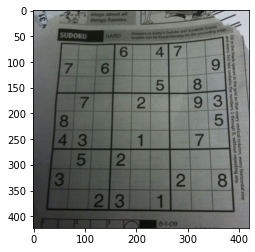

In [6]:
#use the dict as a switch-case
name=baseFileNameList[4]
img=imgDict[name]
#opencv is BGR we must change to RGB by hand
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [136]:
#esta fun muestra dos imagenes y devuelve los handles a los ejes para luego poder usarlos con un plot o un scatter
#sacado de https://python4astronomers.github.io/plotting/advanced.html
def disp2img(img1, img2):
    fig1=plt.figure() # create a figure object
    axis1 = fig1.add_subplot(1, 1, 1)  # create an axes object in the figure
    axis1.imshow(img1)
      
    fig2=plt.figure() # create a figure object
    axis2= fig2.add_subplot(1, 1, 1)  # create an axes object in the figure
    axis2.imshow(img2)
    return axis1, axis2;

# Scaling

In [137]:
#remember python intervals are closed-open [..) :2==0,1    1:2==1
NR, NC = img.shape[:2]

In [138]:
%whos

Variable           Type           Data/Info
-------------------------------------------
M                  ndarray        2x3: 6 elems, type `float64`, 48 bytes
NC                 int            272
NR                 int            280
axis1              AxesSubplot    AxesSubplot(0.268024,0.125;0.488952x0.755)
axis2              AxesSubplot    AxesSubplot(0.268024,0.125;0.488952x0.755)
baseDir            str            ..\..\ExamplesRepo
baseFileNameList   tuple          n=4
cv2                module         <module 'cv2' from 'C:\\A<...>\cv2.cp37-win_amd64.pyd'>
cx                 float          136.0
cy                 float          140.0
disp2img           function       <function disp2img at 0x00000253C46E5C80>
fileName           str            ..\..\ExamplesRepo\rose.png
img                ndarray        280x272: 76160 elems, type `uint8`, 76160 bytes
imgDict            dict           n=4
imgnew             ndarray        280x272: 76160 elems, type `uint8`, 76160 bytes
name    

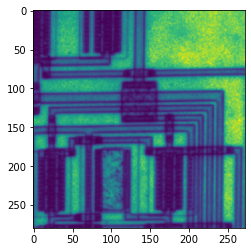

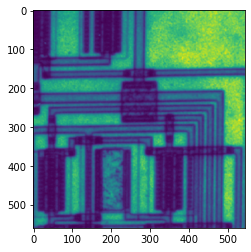

In [139]:
imgnew = cv2.resize(img,(2*NC, 2*NR), interpolation = cv2.INTER_CUBIC)
axis1, axis2=disp2img(img, imgnew)

# Translation

<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/22fe551f03b8e94f1a7a75731a660f0163030540.png">

In [140]:
tx, ty=(100, 50) #traslation in px
sx, sy=(0.5,1) #scaling in x,y
#affine transformation
M = np.float32([[sx,0,tx],[0,sy,ty]])

(<AxesSubplot:>, <AxesSubplot:>)

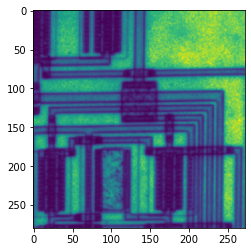

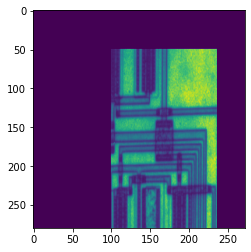

In [141]:
imgnew = cv2.warpAffine(img,M,(NC,NR))
disp2img(img, imgnew)

# Rotation

<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/f3a6bed945808a1f3a9df71b260f68f8e653af95.png">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/91ff2b9b1db0760f4764631010749e594cdf5f5f.png">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/383c254fc602c57a059a8296357f90fdf421aee7.png">

In [142]:
cx, cy=(0.5*NC,0.5*NR) #rot center
theta=45 #rotation deg
s=0.5 #scale
M = cv2.getRotationMatrix2D((cx,cy),theta,s)

(<AxesSubplot:>, <AxesSubplot:>)

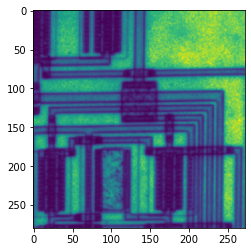

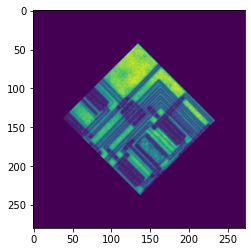

In [143]:
imgnew = cv2.warpAffine(img,M,(NC,NR))
disp2img(img, imgnew)

# Affine Transformation

In [156]:
#use the dict as a switch-case get circuit
name=baseFileNameList[2]
img=imgDict[name]
NR,NC = img.shape

In [157]:
pts1 = np.float32([[50,50],[200,50],[50,200]]) #3x2
pts2 = np.float32([[10,100],[200,50],[100,250]]) #3x2
M = cv2.getAffineTransform(pts1,pts2)

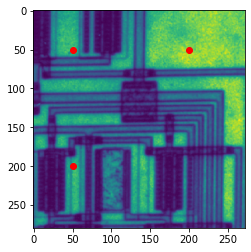

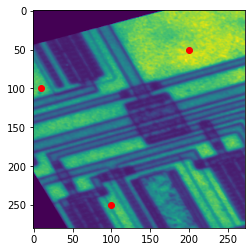

In [158]:
imgnew = cv2.warpAffine(img,M,(NC,NR))
#AQ superponer a las imagenes mostradas por disp2img, cambiar disp2img que devuelva los dos handles y usarlos para superponerlos
plt.imshow(img)
plt.scatter(pts1[:, 0],pts1[:, 1],color='r')
plt.show()
plt.imshow(imgnew)
plt.scatter(pts2[:, 0],pts2[:, 1],color='r')
plt.show()

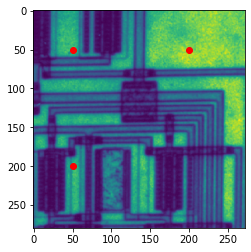

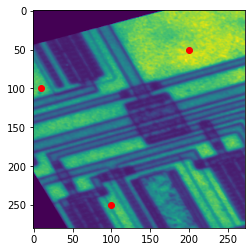

In [149]:
axis1, axis2=disp2img(img, imgnew)
axis1.scatter(pts1[:, 0],pts1[:, 1],color='r')
axis2.scatter(pts2[:, 0],pts2[:, 1],color='r')

# Perspective Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

In [179]:
#use the dict as a switch-case get circuit
name=baseFileNameList[4]
img=imgDict[name]
NR,NC,NP = img.shape

In [180]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

In [181]:
imgnew = cv2.warpPerspective(img,M,(300,300))

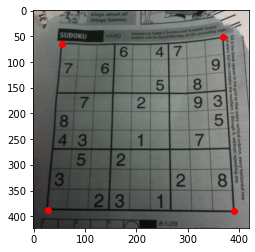

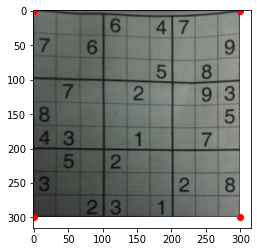

In [183]:
axis1, axis2=disp2img(img, imgnew)
axis1.scatter(pts1[:, 0],pts1[:, 1],color='r')
axis2.scatter(pts2[:, 0],pts2[:, 1],color='r')